### TODO
- latency compared with ebpf x2 (load 0, load 3/13)
- rate compared with ebpf x2 (load 0, load 3/13)
- latency average over working point (up to 50% max) at all loads (0,1,2,3...)
- max rate at all loads (0,1,2,3,...)

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
FOLDER = "output/"
CONN_LIST = [*range(1,60), *range(60,100,2), *range(100,201,5)]
COLUMNS = ["conn", "req_num", "latency", "rate"]
TEST_LIST = ["0-", "1-", "2-", "3-", "13-", ""]
TEST_LIST = ["0-"]

In [69]:
results = dict()
for test in TEST_LIST:
    latencies = list()
    rates = list()
    for conn in CONN_LIST:
    # for conn in [1]:
        df = pd.read_csv(f"{FOLDER}{test}{conn}.csv", index_col=None, header=None, names=COLUMNS)
        # print(df.describe())
        row = df.median()
        row = df.mean()
        df_ebpf = pd.read_csv(f"{FOLDER}ebpf-{test}{conn}.csv", index_col=None, header=None, names=COLUMNS)
        row_ebpf = df_ebpf.median()
        row_ebpf = df_ebpf.mean()
        lat_increase = row_ebpf["latency"] / row["latency"] - 1
        rate_decrease = 1 - row_ebpf["rate"] / row["rate"]
        latencies.append(lat_increase)
        rates.append(rate_decrease)
    results[test] = {"latencies": latencies, "rates": rates}

In [70]:
results2 = dict()
for test in TEST_LIST:
    latencies = list()
    rates = list()
    ebpf_lat = list()
    ebpf_rate = list()
    for conn in CONN_LIST:
    # for conn in [1]:
        df = pd.read_csv(f"{FOLDER}{test}{conn}.csv", index_col=None, header=None, names=COLUMNS)
        # print(df.describe())
        row = df.median()
        row = df.mean()
        df_ebpf = pd.read_csv(f"{FOLDER}ebpf-{test}{conn}.csv", index_col=None, header=None, names=COLUMNS)
        row_ebpf = df_ebpf.median()
        row_ebpf = df_ebpf.mean()
        lat_increase = row_ebpf["latency"]
        rate_decrease = row_ebpf["rate"]
        latencies.append(row["latency"])
        rates.append(row["rate"])
        ebpf_lat.append(lat_increase)
        ebpf_rate.append(rate_decrease)
        results2[test] = {"latencies": latencies,
                      "rates": rates,
                      "ebpf_latencies": ebpf_lat,
                      "ebpf_rates": ebpf_rate}

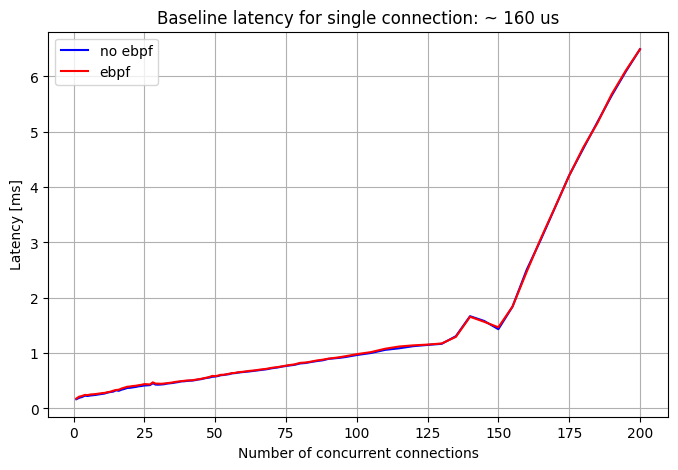

In [78]:
fig, ax = plt.subplots(figsize=(8,5))
# for test in TEST_LIST2:
#     ax.plot(CONN_LIST, results[test]["latencies"])
ax.set_ylabel("Latency [ms]")
ax.plot(CONN_LIST, results2["0-"]["latencies"], 'b')
ax.plot(CONN_LIST, results2["0-"]["ebpf_latencies"], 'r')
# ax.plot(CONN_LIST, results2["2-"]["latencies"], 'b')
# ax.plot(CONN_LIST, results2["3-"]["latencies"], 'b')
# ax.plot(CONN_LIST, results2["13-"]["latencies"], 'b')

# ax.legend(TEST_LIST2)
ax.set_xlabel("Number of concurrent connections")
# ax.set_ylabel("Latency increase [%]")
ax.set_title("Baseline latency for single connection: ~ 160 us")
# ax.set_xlim(1, 100)
# ax.set_ylim(0, 1)
# ax.set_xticklabels([1, 20, 40, 60, 80, 100])
# ax.set_xticks([1, 20, 40, 60, 80, 100])
ax.grid()
# ax.set_ylabel("Request rate [rps]")
# ax.plot(CONN_LIST, results2["0-"]["rates"], 'b')
# ax.plot(CONN_LIST, results2["0-"]["ebpf_rates"], 'r')
# ax.plot(CONN_LIST, results2["13-"]["rates"], 'b')
# ax.plot(CONN_LIST, results2["13-"]["ebpf_rates"], 'r')
ax.legend(["no ebpf", "ebpf"])

### TODO: 1- test delete last 20 lines

KeyError: '1-'

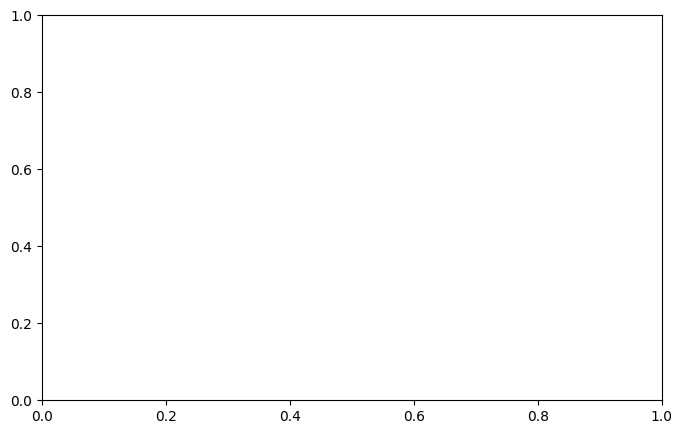

In [72]:
fig, ax = plt.subplots(figsize=(8,5))
# for test in TEST_LIST2:
#     ax.plot(CONN_LIST, results[test]["latencies"])
ax.plot(CONN_LIST, [x * 100 for x in results["1-"]["latencies"]], 'b')
# ax.legend(TEST_LIST2)
ax.set_xlabel("Number of concurrent connections")
# ax.set_ylabel("Latency increase [%]")
ax.set_title("Baseline latency for single connection: ~ 160 us")
ax.set_xlim(1, 100)
ax.set_ylim(-4, 12)
ax.set_xticklabels([1, 20, 40, 60, 80, 100])
ax.set_xticks([1, 20, 40, 60, 80, 100])
ax.grid()
ax.set_ylabel("[%]")
ax.plot(CONN_LIST, [x * 100 for x in results["1-"]["rates"]], 'r')
ax.legend(["Latency increase", "Requests per second decrease"])